In [1]:
from training import *
from analysis import *
from network import *

Fig 4c

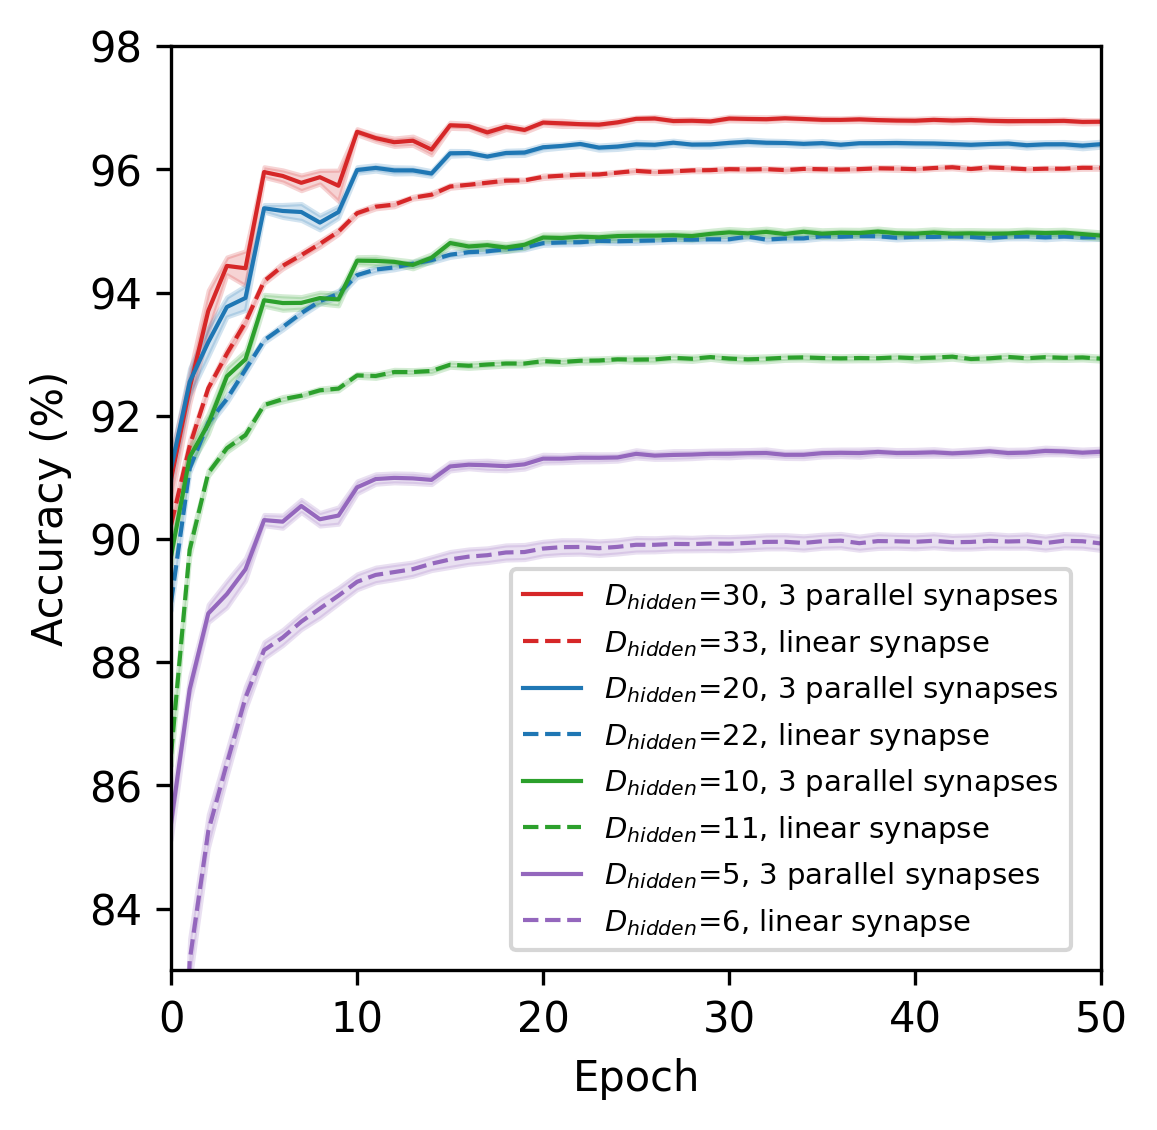

In [2]:
plt.figure(figsize=(4, 4), dpi=300)    
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple']
for iH, (H1, H2) in enumerate([(33,30),(22,20), (11,10),(6,5)]):
        files = [
        f'parallel_nll_H{H2}_M3_bias0_range3_lr_thres0.02_lr_ampli0.02_lr_slope0.02_lr_scaler0.001_lr0.001_schedulerTrue_decrease_5_epoch_factor_0.5_initialization_slope_1_lr_bias_0.01_softplus.pkl',
        f'2nn_nll_H{H1}_lr0.002__bias0_schedulerTrue_decrease_5_epoch_factor_0.5_lr_bias_0.01_softplus.pkl',
        ]

        labels = [   r'$D_{hidden}$'+f'={H2}, 3 parallel synapses', r'$D_{hidden}$'+f'={H1}, linear synapse', f'H = {H2}, M = 3',f'H = {H2}, M = 5',  'H = 30, M = 7', 'H = 20, M = 10']

        for i, file in enumerate(files):
                with open('results_MNIST/'+file, 'rb') as f:
                        results1 = pickle.load(f)  
                acc1 = get_acc(results1)
                ls = '-' if i == 0 else '--'
                plt.plot(acc1.mean(axis=0), label= labels[i], linestyle= ls, linewidth = 1,color=colors[iH])
                plt.fill_between(np.arange(acc1.shape[1]), 
                        acc1.mean(axis = 0) - acc1.std(axis = 0)/np.sqrt(len(results1)), 
                        acc1.mean(axis = 0) + acc1.std(axis = 0)/np.sqrt(len(results1)), alpha = 0.2, color=colors[iH]) 
                
plt.legend(ncol = 1, fontsize = 7, bbox_to_anchor=(.35, 0.45))
plt.xlim([0, 50])
plt.ylim([83,98]) 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy (%)')
plt.savefig('fig4c.pdf')

Fig 4d

Fig 5, 6 & 7

fig 5


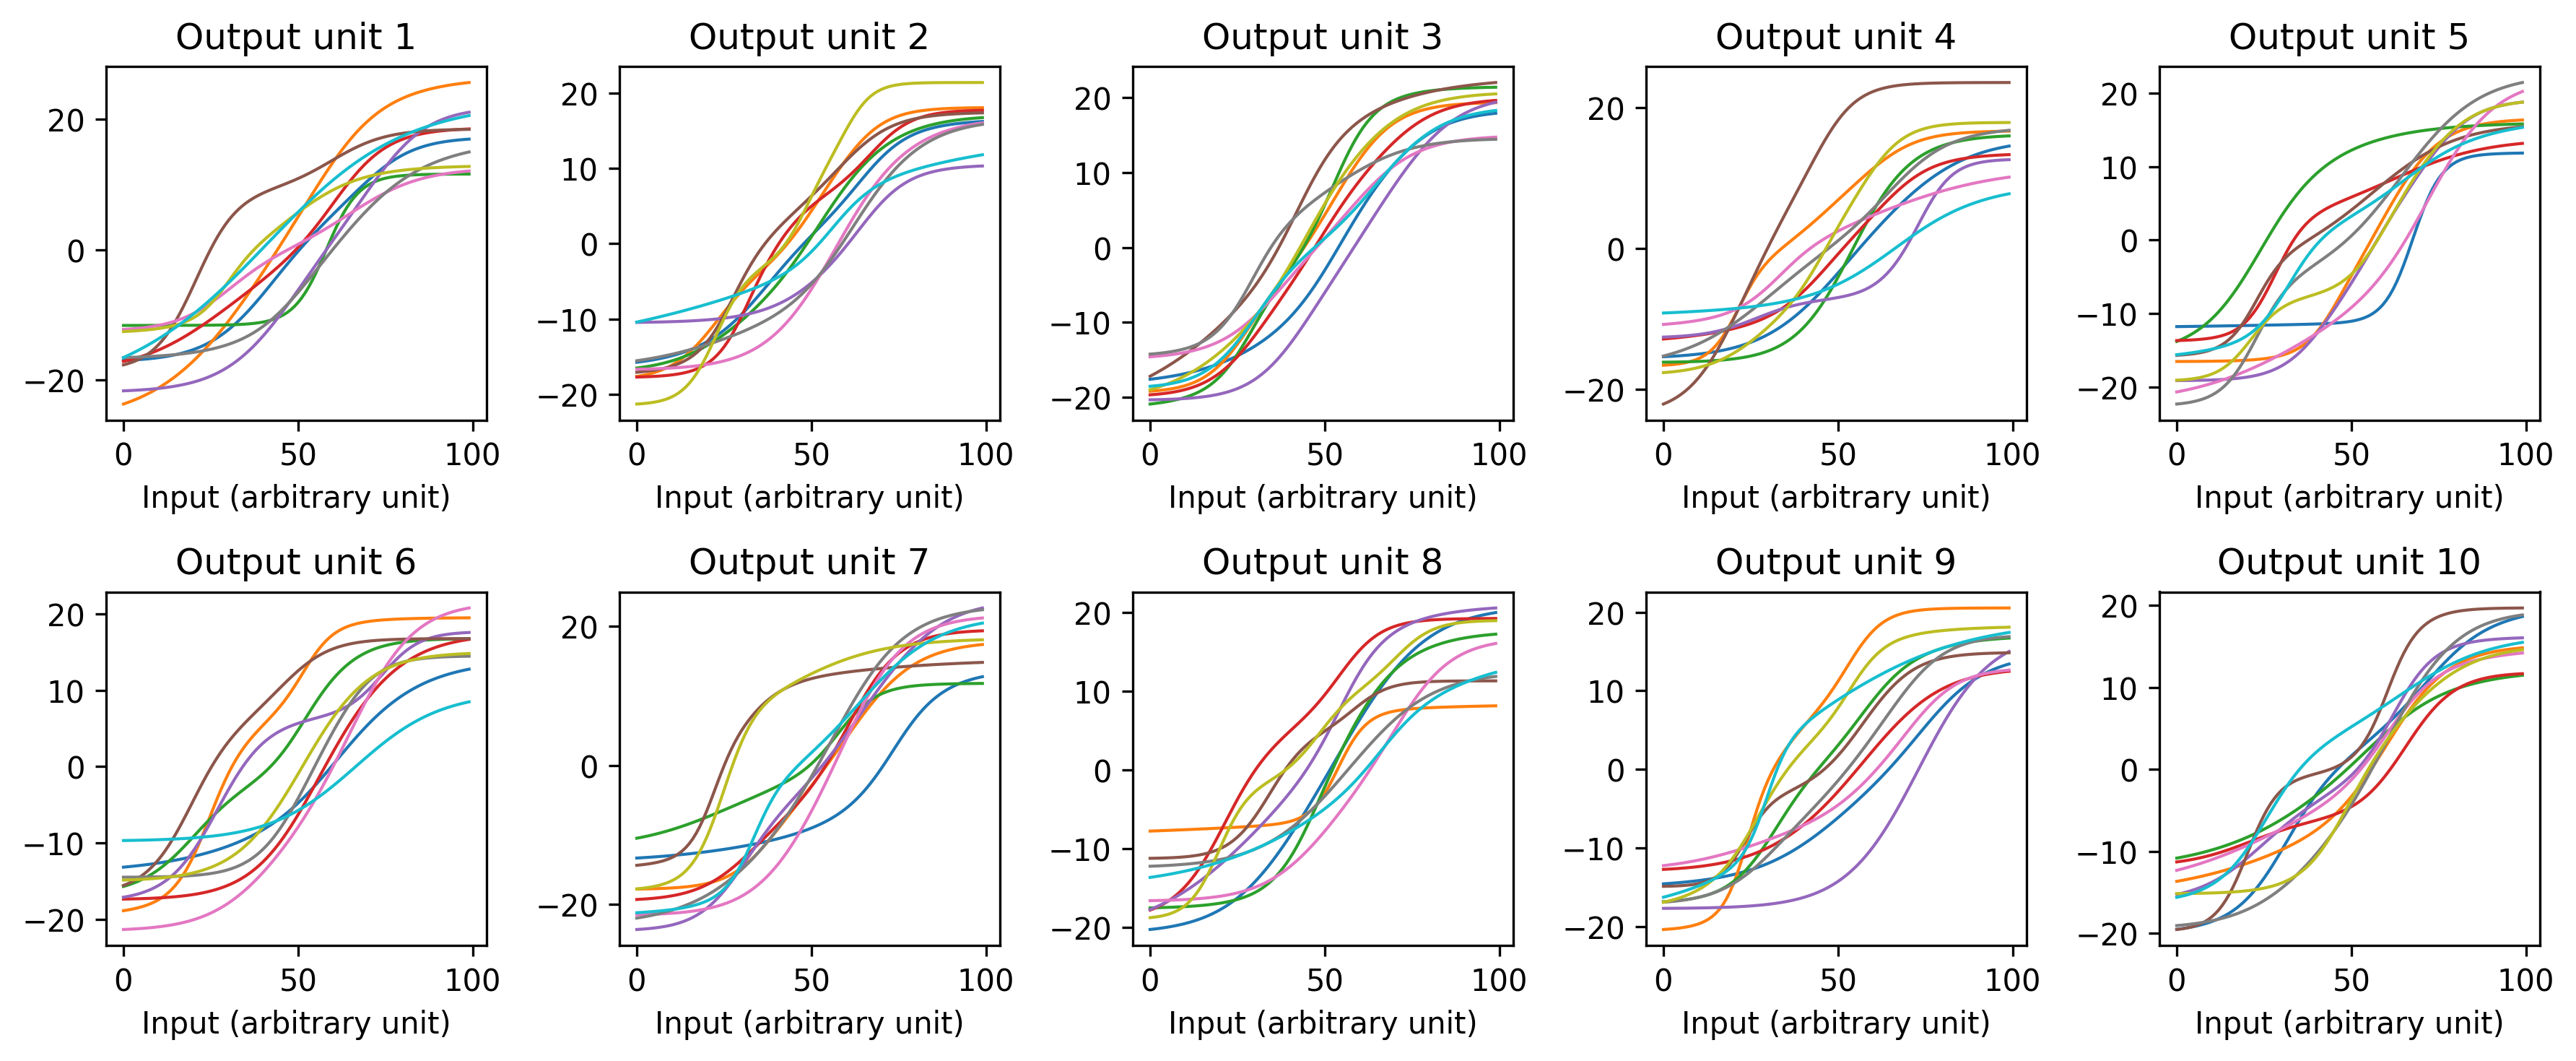

fig 6


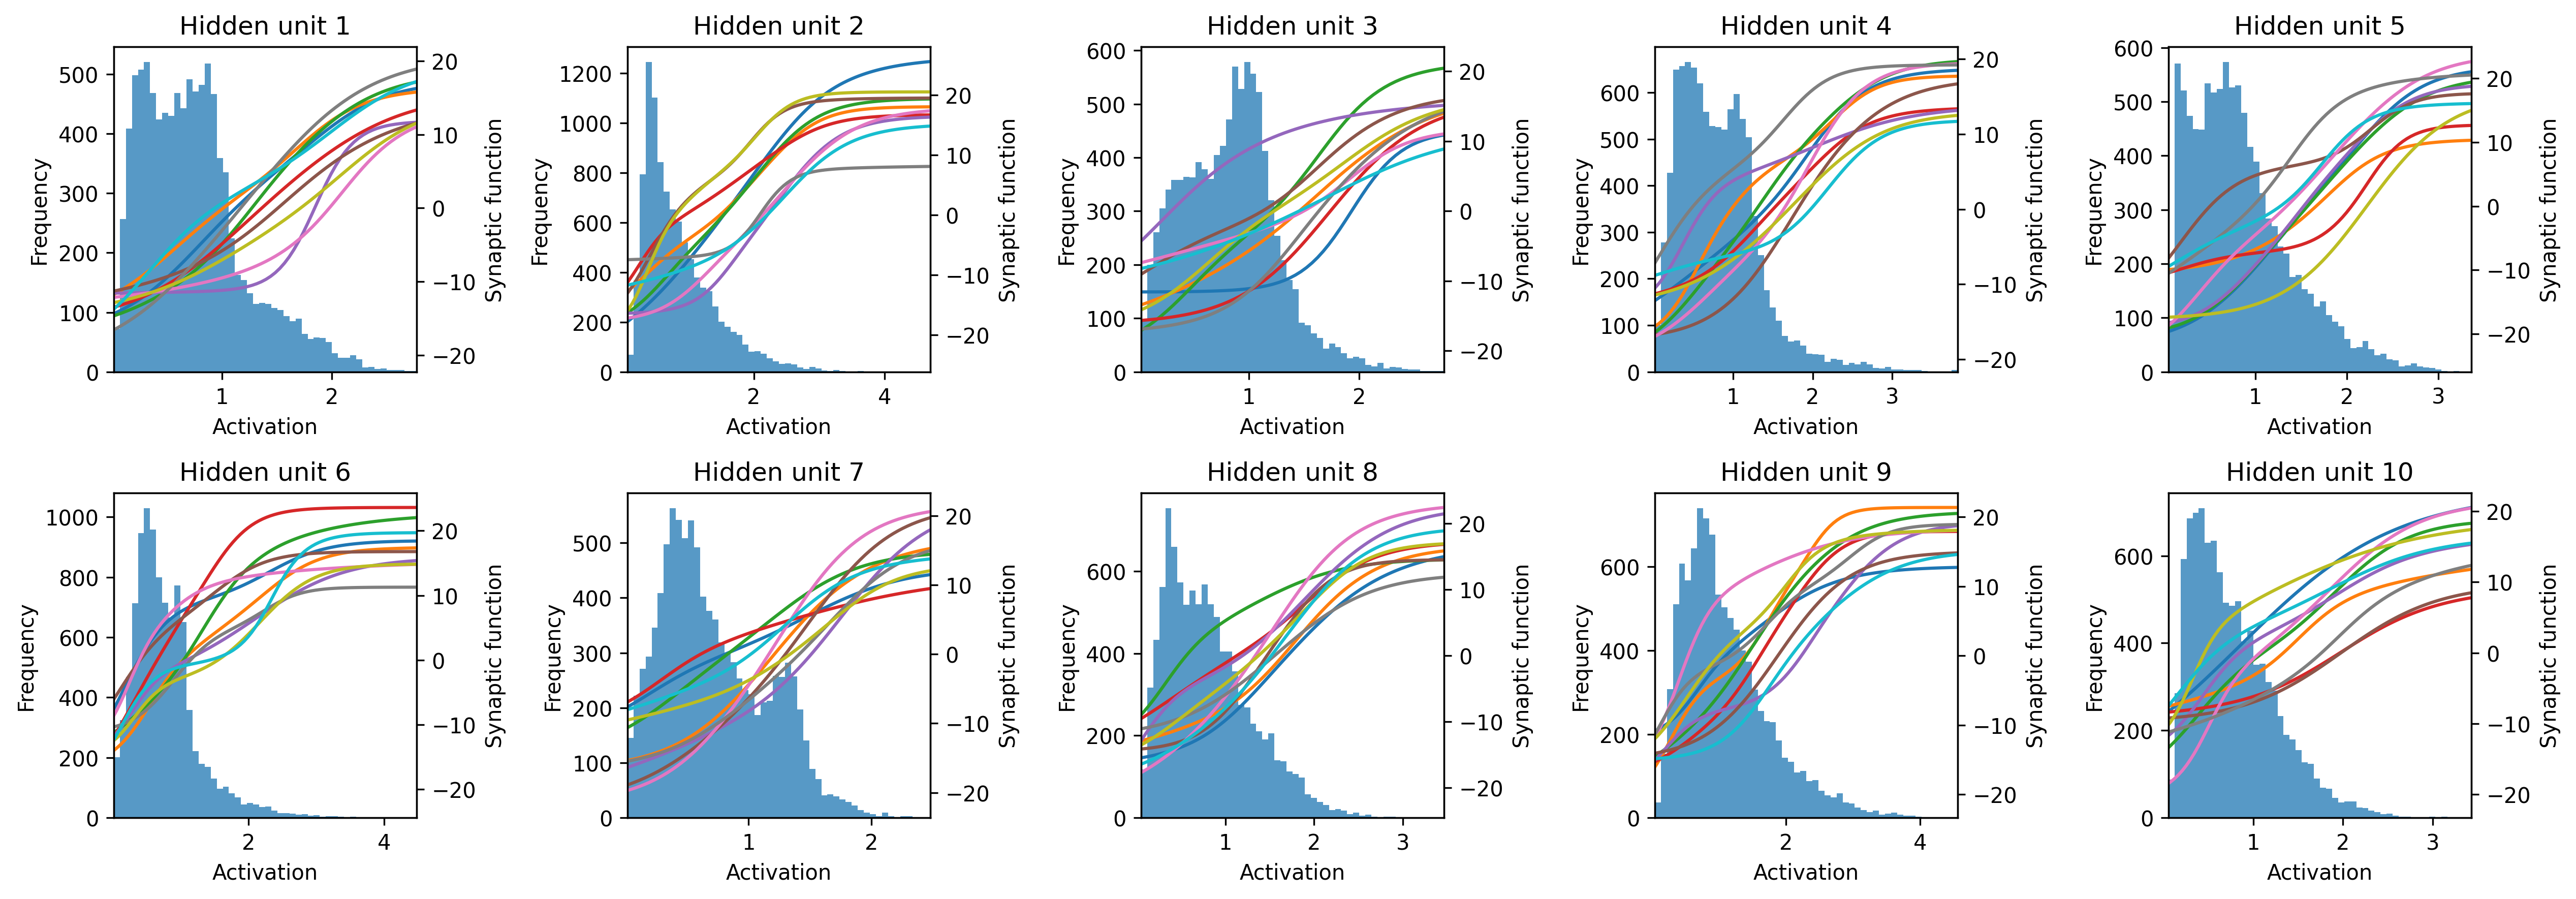

fig 7


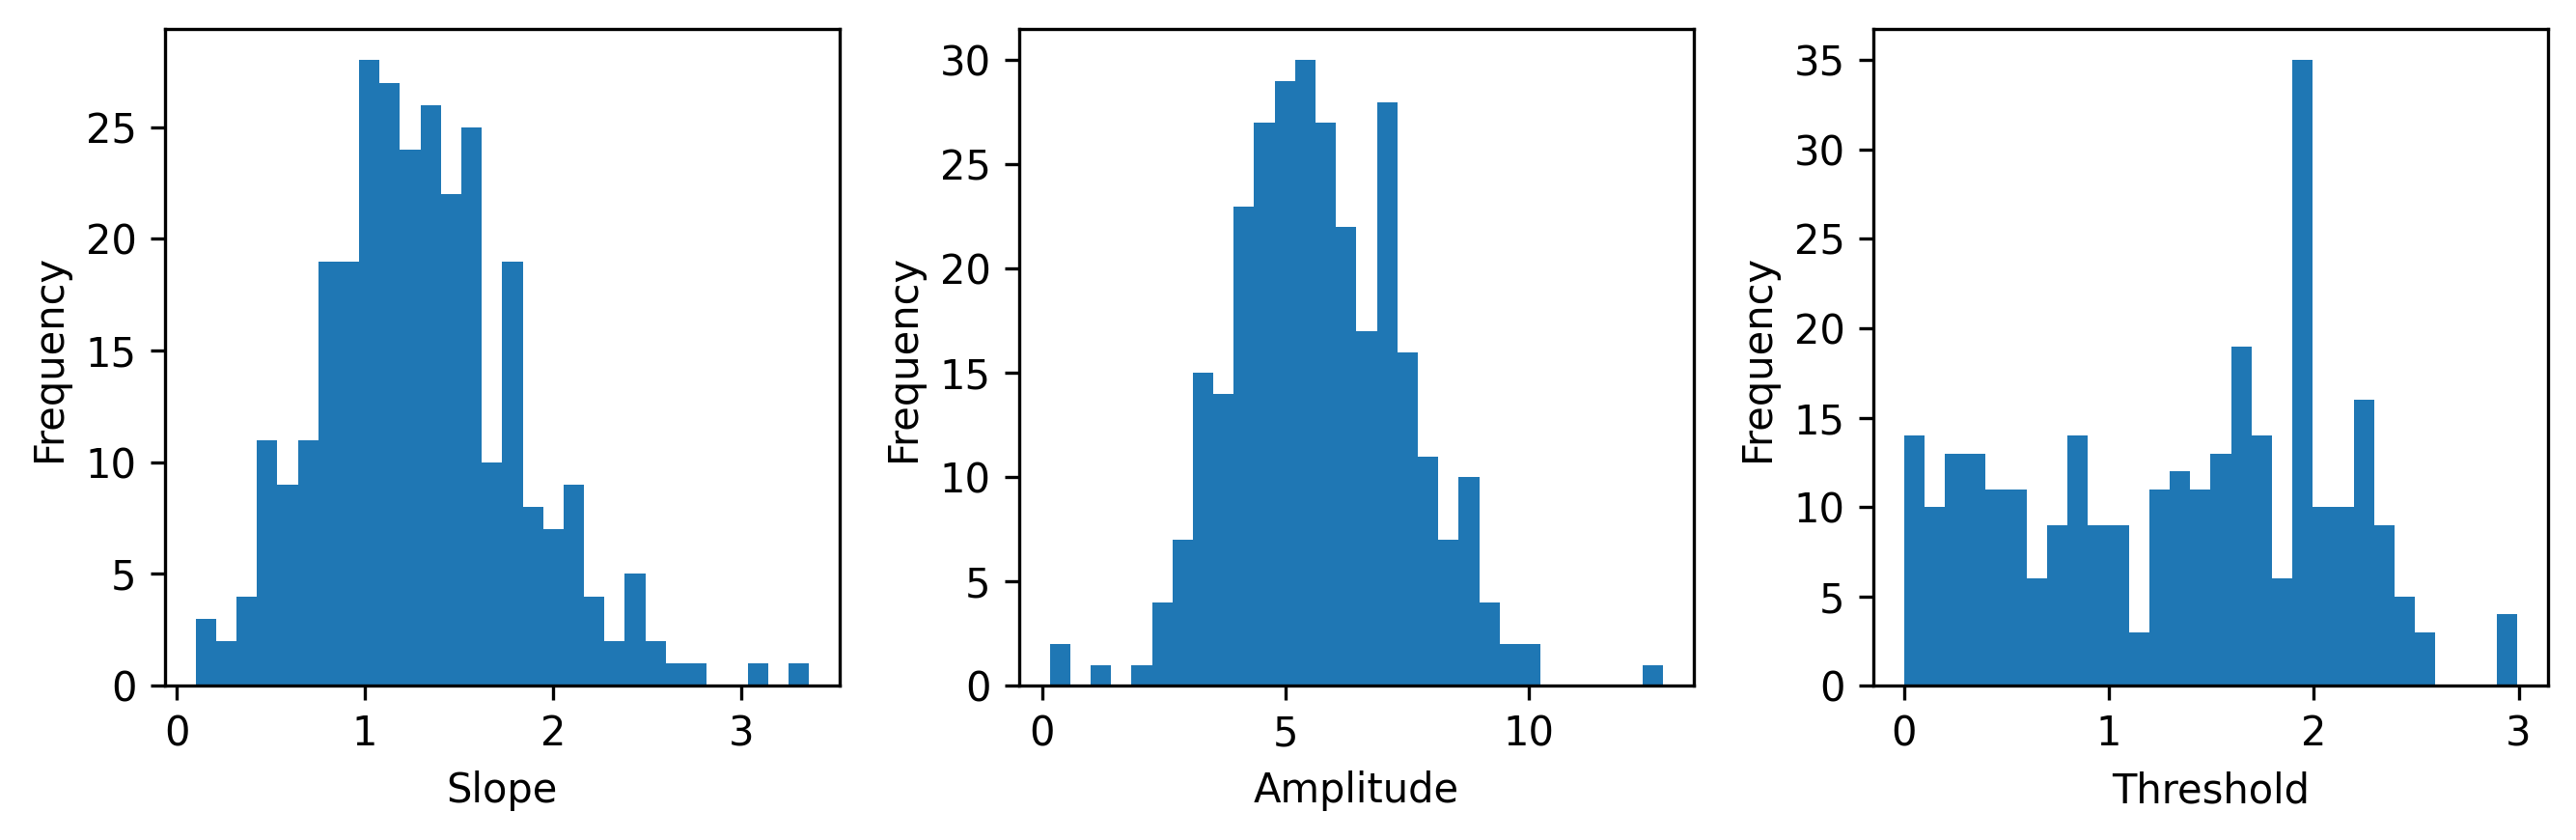

In [6]:
files = [
    './results_MNIST/parallel_nll_H10_M3_bias0_range3_lr_thres0.02_lr_ampli0.02_lr_slope0.02_lr_scaler0.001_lr0.001_schedulerTrue_decrease_5_epoch_factor_0.5_initialization_slope_1_lr_bias_0.01_softplus.pkl', 
]
for i, file in enumerate(files): 
    with open(file, 'rb') as f:
        results1 = pickle.load(f)
    for r in results1[:1]:
        model = r['model']
        print('fig 5')
        plot_synaptic_func_by_output(model, testloader )
        print('fig 6')
        plot_hidden_actv_linear(model, testloader   )
        print('fig 7')
        plot_synaptic_distribution(model)

Fig 4a

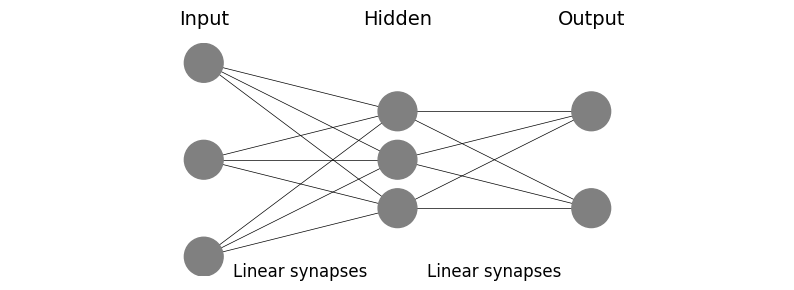

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define a function to create a circle
def create_circle(x, y, radius=0.1, color='blue'):
    return plt.Circle((x, y), radius, color=color, fill=True, zorder=10)

# Define the positions of the nodes in each layer
input_positions = [(1, 1), (1, 0.5), (1, 0)]
hidden_positions = [(2, 0.75), (2, 0.5), (2, 0.25)]
output_positions = [(3, 0.75), (3, 0.25)]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Create circles for the input layer
for position in input_positions:
    circle = create_circle(position[0], position[1], color='grey')
    ax.add_artist(circle)

# Create circles for the hidden layer
for position in hidden_positions:
    circle = create_circle(position[0], position[1], color='grey')
    ax.add_artist(circle)

# Create circles for the output layer
for position in output_positions:
    circle = create_circle(position[0], position[1], color='grey')
    ax.add_artist(circle)

# Connect each node in the input layer with every node in the hidden layer
for input_position in input_positions:
    for hidden_position in hidden_positions:
        ax.plot([input_position[0], hidden_position[0]], [input_position[1], hidden_position[1]], 'k-', lw=0.5)

# Connect each node in the hidden layer with every node in the output layer
for hidden_position in hidden_positions:
    for output_position in output_positions:
        ax.plot([hidden_position[0], output_position[0]], [hidden_position[1], output_position[1]], 'k-', lw=0.5)

# Set limits, aspect and remove the axes
ax.set_xlim(0, 4)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('equal')
ax.axis('off')

# Add layer names
plt.text(1, 1.2, 'Input' , fontsize=14, ha='center')
# plt.text(1, 1.2, , fontsize=14, ha='center')
plt.text(2, 1.2, 'Hidden', fontsize=14, ha='center')
plt.text(3, 1.2, 'Output', fontsize=14, ha='center')

# add rectangles to the input layer

# rect = patches.Rectangle((2.2, 0.2), .6, 0.6, edgecolor='red', facecolor='none', zorder=10)
# ax.add_patch(rect)

plt.text(1.5, -.1, 'Linear synapses', fontsize=12, ha='center')
plt.text(2.5, -.1, 'Linear synapses', fontsize=12, ha='center')
# plt.text(2.5, -.1, 'Parallel synapses', fontsize=12, ha='center', color='red')
plt.text(1.5, 1.5, '', fontsize=12, ha='center')
# plt.title('2NN model with parallel synapses', fontsize=14)
# Show the plot
plt.savefig('./results_MNIST/2nn_parallel.pdf', bbox_inches='tight')
plt.show()
